In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
heart_df = pd.read_csv('lab2_dataset.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 1. Identify what are the data types of each column (Nominal vs. Continous).

__Sex (Male or Female)__: Nominal 

__Age__: Continous

__cp__: Nominal

__trestbps__: Continous

__Chol__: Continous 

__fbs__: Nominal

__restecg__: Nominal

__thalach__: Continous

__exang__: Nominal

__oldpeak__: Continous

__slope__: Nominal

__ca (number of major blood vessels__: Nominal

__thal__: Nominal

__Target__: Nominal

### 2. Correlation heatmap

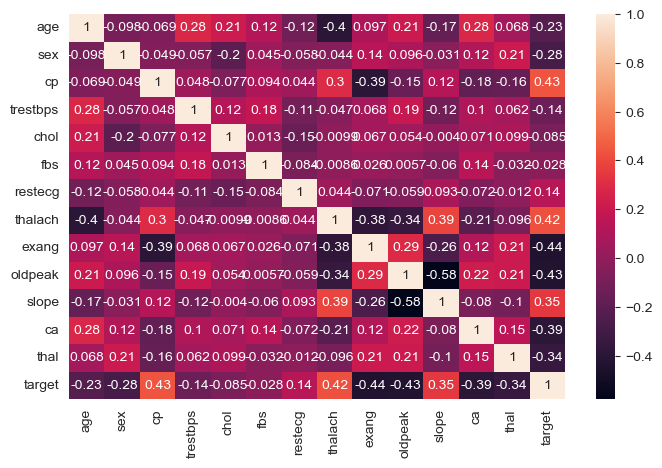

In [7]:
sns.heatmap(heart_df.corr(), annot=True) 
plt.show()

### 3. . According to the heatmap, do you think some of the feature should not be count in the logistic regression? Which ones? How do you know? (Hint: Find the corrrelated pairs first and choose items with strong (around 0.4) correlation). (10 points)

Answer: The pairs that show a strong correlation (above +/- 0.4) from the heatmap abover are oldpeak & slope with correlation of -0.58, and thalach & exang with -0.4 correlation. In regards with our target variable, high correlation is shown with cp at 0.43, thalach at 0.42, exang at -0.44, and with oldpeak at -0.43. There is no features with over 0.8 correlation present, so no multicolinearity issue. Hence, I think there is no reason for variables to be excluded form logistic regression.

### 4.  How many null values are there in each feature? (4 points)

Answer: As shown by .info() above, there appreas to be no missing values as there are 303 non-null values in all columns. We can also use isnull().sum() to see the count of nulls.

In [8]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 5. Show the histogram of each factors and comment on the distribution of some of them. (5 points)

The histograms for the features are plotted below. The first block of code is for categorical variables, and the second block of code is for numerical continous variables. The dataset is imbalanced. Based on the histograms, there are more males then females, chest pain type 0 and 2 are majority, most of the patients have lover fasting blood suagrs. Thalassemia of type 2 is high. The graph for resting blood pressure, oldpeak, and cholesterol is skewed right, and 
thal and age is skewed left.

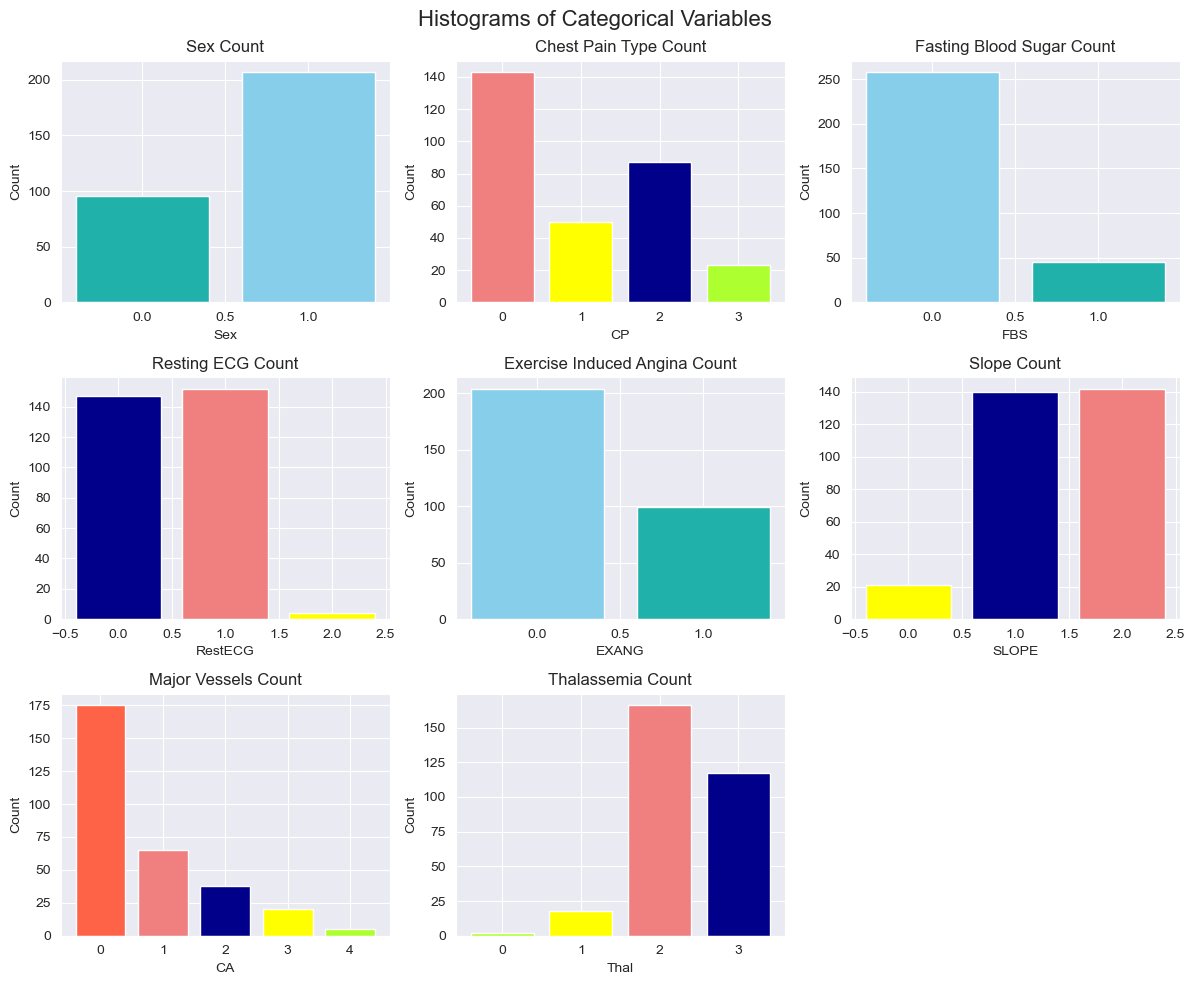

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle("Histograms of Categorical Variables", fontsize=16)

axes[0, 0].bar(heart_df['sex'].value_counts().index, heart_df['sex'].value_counts().values, color=['skyblue','lightseagreen'])
axes[0, 0].set_title("Sex Count")
axes[0, 0].set_xlabel("Sex")
axes[0, 0].set_ylabel("Count")

axes[0, 1].bar(heart_df['cp'].value_counts().index, heart_df['cp'].value_counts().values, color=['lightcoral','darkblue','yellow','greenyellow'])
axes[0, 1].set_title("Chest Pain Type Count")
axes[0, 1].set_xlabel("CP")
axes[0, 1].set_ylabel("Count")

axes[0, 2].bar(heart_df['fbs'].value_counts().index, heart_df['fbs'].value_counts().values, color=['skyblue','lightseagreen'])
axes[0, 2].set_title("Fasting Blood Sugar Count")
axes[0, 2].set_xlabel("FBS")
axes[0, 2].set_ylabel("Count")

axes[1, 0].bar(heart_df['restecg'].value_counts().index, heart_df['restecg'].value_counts().values, color=['lightcoral','darkblue','yellow'])
axes[1, 0].set_title("Resting ECG Count")
axes[1, 0].set_xlabel("RestECG")
axes[1, 0].set_ylabel("Count")

axes[1, 1].bar(heart_df['exang'].value_counts().index, heart_df['exang'].value_counts().values, color=['skyblue','lightseagreen'])
axes[1, 1].set_title("Exercise Induced Angina Count")
axes[1, 1].set_xlabel("EXANG")
axes[1, 1].set_ylabel("Count")

axes[1, 2].bar(heart_df['slope'].value_counts().index, heart_df['slope'].value_counts().values, color=['lightcoral','darkblue','yellow'])
axes[1, 2].set_title("Slope Count")
axes[1, 2].set_xlabel("SLOPE")
axes[1, 2].set_ylabel("Count")

axes[2, 0].bar(heart_df['ca'].value_counts().index, heart_df['ca'].value_counts().values, color=['tomato','lightcoral','darkblue','yellow','greenyellow'])
axes[2, 0].set_title("Major Vessels Count")
axes[2, 0].set_xlabel("CA")
axes[2, 0].set_ylabel("Count")

axes[2, 1].bar(heart_df['thal'].value_counts().index, heart_df['thal'].value_counts().values, color=['lightcoral','darkblue','yellow','greenyellow'])
axes[2, 1].set_title("Thalassemia Count")
axes[2, 1].set_xlabel("Thal")
axes[2, 1].set_ylabel("Count")

# Remove empty subplot
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

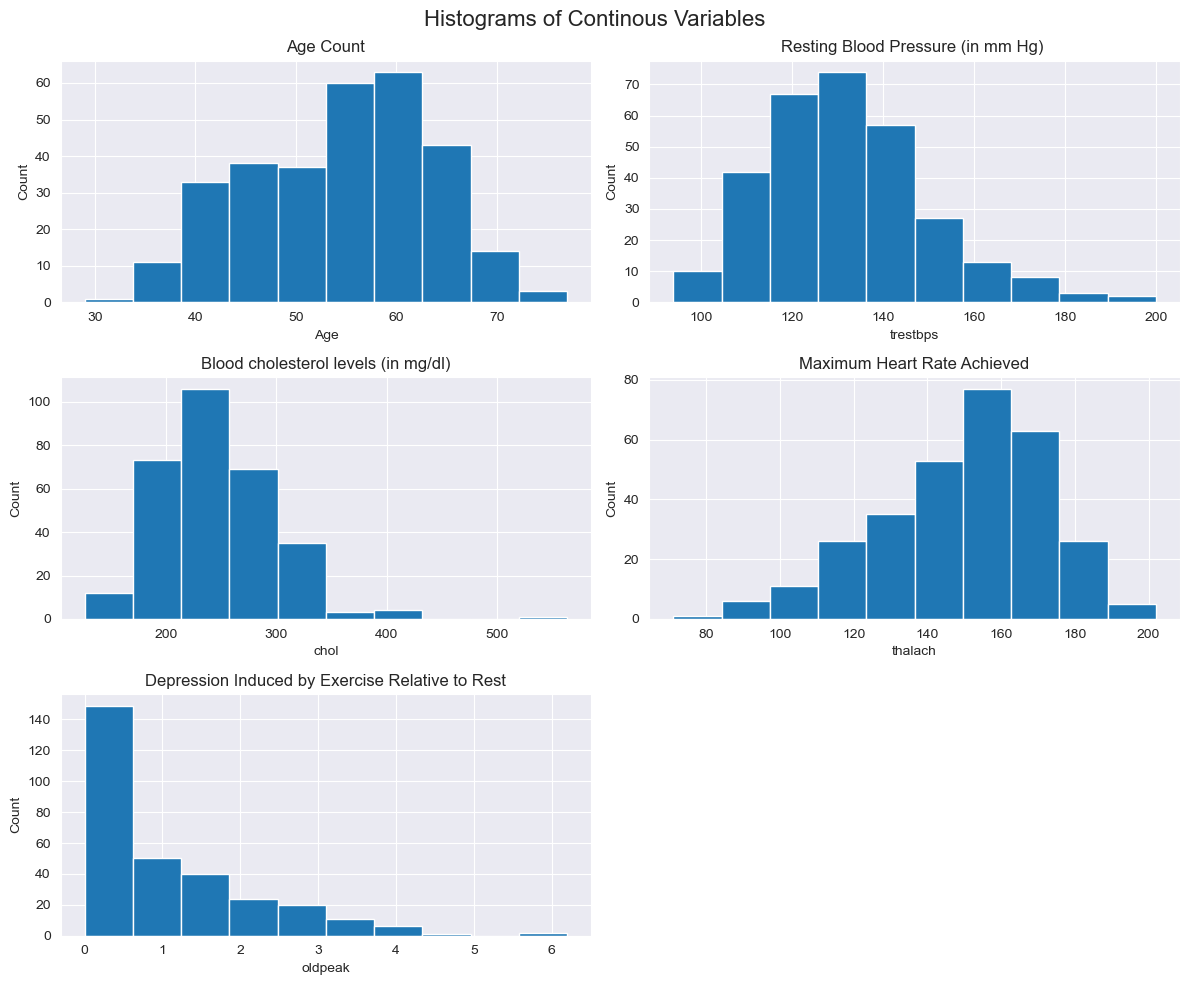

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Histograms of Continous Variables", fontsize=16)

axes[0, 0].hist(heart_df['age'])
axes[0, 0].set_title("Age Count")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

axes[0, 1].hist(heart_df['trestbps'])
axes[0, 1].set_title("Resting Blood Pressure (in mm Hg) ")
axes[0, 1].set_xlabel("trestbps")
axes[0, 1].set_ylabel("Count")

axes[1, 0].hist(heart_df['chol'])
axes[1, 0].set_title("Blood cholesterol levels (in mg/dl)")
axes[1, 0].set_xlabel("chol")
axes[1, 0].set_ylabel("Count")

axes[1, 1].hist(heart_df['thalach'])
axes[1, 1].set_title("Maximum Heart Rate Achieved")
axes[1, 1].set_xlabel("thalach")
axes[1, 1].set_ylabel("Count")

axes[2, 0].hist(heart_df['oldpeak'])
axes[2, 0].set_title("Depression Induced by Exercise Relative to Rest")
axes[2, 0].set_xlabel("oldpeak")
axes[2, 0].set_ylabel("Count")

# Remove empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

### 6. Split the data set into X (features) and y. The features to use are age, sex, cp, thalach, slope and restecg. (6 points)

In [11]:
features = ['age','sex','cp','thalach','slope','restecg']
X = heart_df[features]
y = heart_df['target']

###  7. Plot K Neighbors Classifier Scores for different K values: Perform 5-fold cross-validation to evaluate the model's performance for upto 50 neighbors. Then plot the results. Which K value gives the highest cross-validation score? (10 points)

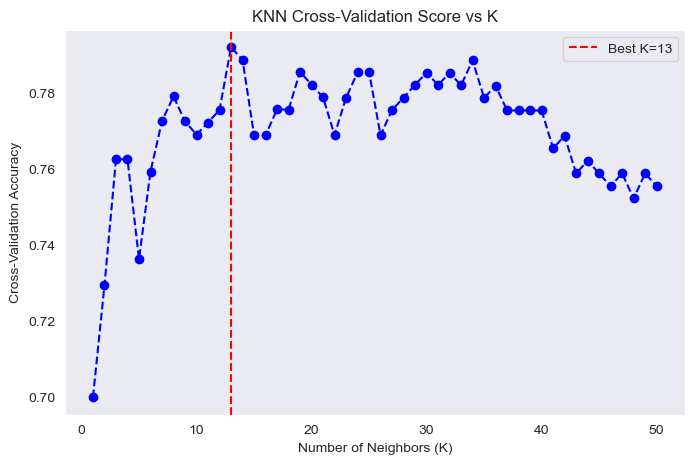

In [12]:
from sklearn.preprocessing import StandardScaler

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cv_scores = []
for i in range(1, 51):
    knn = KNeighborsClassifier(i)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# best k-value
best_k = range(1, 51)[np.argmax(cv_scores)]
best_score = max(cv_scores)
# Plot the cv accuracy for ea K
plt.plot(range(1,51), cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Cross-Validation Score vs K")
plt.axvline(best_k, color='r', linestyle='--', label=f'Best K={best_k}')
plt.legend()
plt.grid()
plt.show()

### 8. Find the Average cross validation score for 11 neighbours. Hint use .mean() for average. (6 points)

In [13]:
# cov for k=11
knn = KNeighborsClassifier(n_neighbors=11)
CVscores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
avg_CVscore = CVscores.mean()

print(f"The average cross validation score for 11 neighbours is {avg_CVscore}.")

The average cross validation score for 11 neighbours is 0.7721311475409836.


### 9. Split the dataset into X_train, X_test, y_train and y_test. Split using 70% training and 30% test set. Use random state = 5. Then train the classifier. Then predict y using this. (6 points)

In [14]:
# features and target are already defined in the previous cells above

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# scale the train and test features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with k set as k = 13 because 13 had the best cross validation score
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)

# Predict y
y_pred = knn.predict(X_test_scaled)

### 10. Find the accuracy, precision and recall upto 4 decimal places. Explain what each of these mean. (15 points).

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision score: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall score: {recall:.4f}")

Accuracy score: 0.8132
Precision score: 0.8605
Recall score: 0.7708


The accuracy score is a measure of the overall correctness of our model, and with a score of 0.81 it means that our model has an overall correctness of 81%.
The precision score tells the accuary in classifying positives. our model with 86% has high precision. Recall score is a measure of classifying true positives. With a rate of 77% our models can be said to do a fairly good job. 

### Real-Life Example 1
11. Given a 50 year old male who has chest pain type 3, maximum heart rate 222, and UpSloping ST Segment (slope=0) and resting ecg having LVT (restecg=2), predict if the person has a chance of developing heart disease

In [16]:
# I will be using the KNN trained model above to predict if this patient 
# is at risk or not

# female i 0 and male is 1
patient = pd.DataFrame({'age': [50], 'sex': [1], 'cp': [3], 'thalach':[222],'slope':[0],'restecg':[2]})

#since I scaled my data when training the model I am scaling the patient data here
patient_scaled = scaler.transform(patient)
predicting = knn.predict(patient_scaled)

print(f"The model predict that this patient as {predicting} which means")

# 0 means not at risk, 1 means at risk
if predicting[0] == 1:
    print("the patient is at risk of developing heart disease.")
else:
    print("the patient is NOT at risk of developing heart disease.")

The model predict that this patient as [1] which means
the patient is at risk of developing heart disease.


### Real-Life Example 2
12. Given a 63 year old female who has chest pain type 1, maximum heart rate 100, and Downsloping ST Segment (slope=2) and a normal resting ecg (restecg=0), predict if the person has a chance of developing heart disease.

In [18]:
patient = pd.DataFrame({'age': [63], 'sex': [0], 'cp': [1], 'thalach':[100],'slope':[2],'restecg':[0]})

#since I scaled my data when training the model I am scaling the patient data here
patient_scaled = scaler.transform(patient)
prediction = knn.predict(patient_scaled)

print(f"The model predict that this patient as {prediction} which means")

# 0 means not at risk, 1 means at risk
if prediction[0] == 1:
    print("the patient is at risk of developing heart disease.")
else:
    print("the patient is NOT at risk of developing heart disease.")

The model predict that this patient as [1] which means
the patient is at risk of developing heart disease.
